In [1]:
from common import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)    # REGIONS WITH TUMOR
sub-CON01       2100.0          none                           0.0             0              
sub-CON02       2100.0          none                           0.0             0              
sub-CON03       2100.0          none                           0.0             0              
sub-CON04       2100.0          none                           0.0             0              
sub-CON05       2400.0          none                           0.0             0              
sub-CON06       2400.0          none                           0.0             0              
sub-CON07       2400.0          none                           0.0             0              
sub-CON08       2400.0          none                           0.0             0              
sub-CON09       2400.0          none                           0.0        

In [2]:
control_subset = subjects.get_control_subset()
tumor_subset = subjects.get_tumor_subset()

We compute the mean FC from control subjects to compare afterward

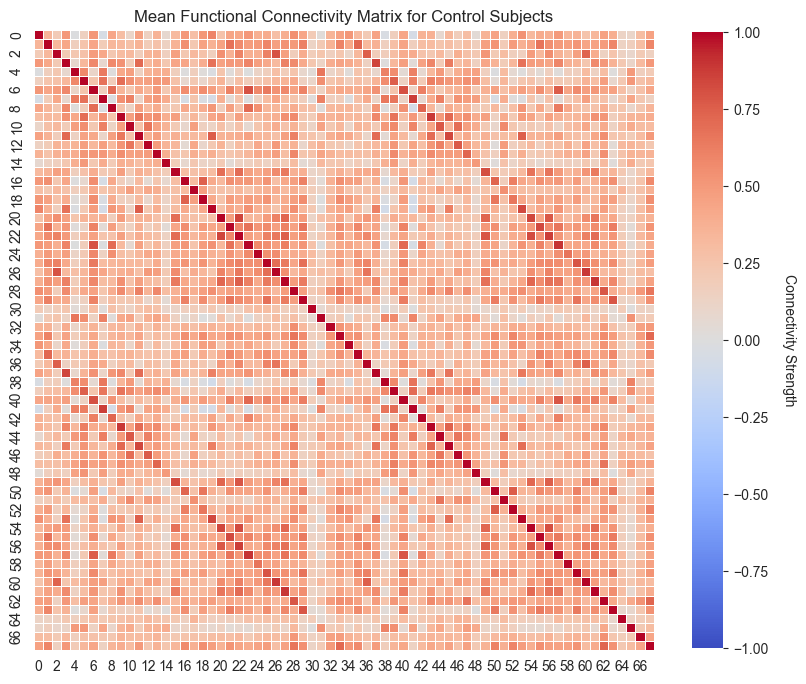

In [3]:
control_fcs = [v.preop_data.fc_dk68 for k, v in control_subset.items()]
mean_control_fc = np.mean(control_fcs, axis=0)

# Let's visualize it using heatmap
plt.figure(figsize=(10,10))
#plt.imshow(mean_control_fc, cmap='viridis')
img = seaborn.heatmap(
    mean_control_fc,
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=.5,
    vmin=-1.0,
    vmax=1.0,
    center=0.0,
)
cbar = img.collections[0].colorbar
cbar.set_label('Connectivity Strength', rotation=270, labelpad=20)
plt.title('Mean Functional Connectivity Matrix for Control Subjects')
plt.show()


Now for all patients we compute the difference between each parcellation region and the mean of that region from control subjects.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions vs. Non Tumor Regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.817e-01 U_stat=9.208e+04


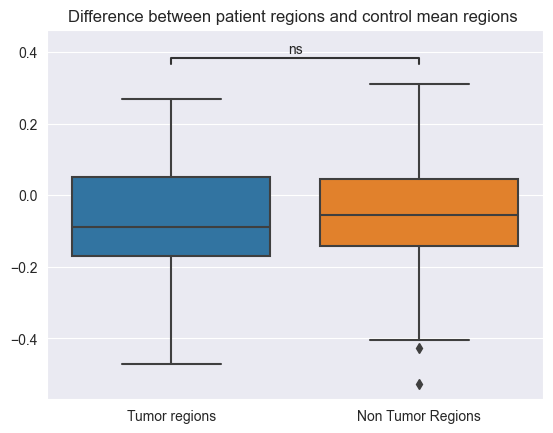

In [4]:

tumor_region_diff = []
non_tumor_region_diff = []

for k, s in tumor_subset.items():
    for idx, rows in enumerate(s.preop_data.fc_dk68):
        region_diff_acc = 0.0
        for other_idx, coef in enumerate(rows):
            # Skip self
            if idx != other_idx:
                region_diff_acc += coef - mean_control_fc[idx, other_idx]

        # Store Mean value for this region
        if s.tumor_regions.is_tumor_region_by_id(idx):
            tumor_region_diff.append(region_diff_acc / 67.0)
        else:
            non_tumor_region_diff.append(region_diff_acc / 67.0)

plotComparisonAcrossLabels2(
    {
        'Tumor regions': tumor_region_diff,
        'Non Tumor Regions': non_tumor_region_diff,
    },
    graphLabel='Difference between patient regions and control mean regions '
)



It seems we can not see anything relevant in here...